🌦️ Weather Forecasting Using Time Series Analysis:

This project focuses on building a Weather Forecasting Model using Time Series techniques. It aims to predict future weather metrics (such as temperature, humidity, or rainfall) based on historical weather data using statistical and machine learning models.

📌 Project Overview:

The objective of this project is to accurately forecast future weather conditions by analyzing patterns in past data. This is crucial for applications like agriculture, disaster preparedness, and travel planning.

In [ ]:
# Importing Necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
# Load the data set
df = pd.read_csv('/content/weather_data.csv')
df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [ ]:
df.isnull().sum()

,0
date,0
meantemp,0
humidity,0
wind_speed,0
meanpressure,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
# Drop the unnecessary Columns.
df.drop(columns=['meantemp', 'wind_speed', 'meanpressure'], axis=1, inplace=True)

In [ ]:
df

,date,humidity
0,2013-01-01,84.500000
1,2013-01-02,92.000000
2,2013-01-03,87.000000
3,2013-01-04,71.333333
4,2013-01-05,86.833333
...,...,...
1457,2016-12-28,68.043478
1458,2016-12-29,87.857143
1459,2016-12-30,89.666667
1460,2016-12-31,87.000000


In [ ]:
df.index = df['date']

In [ ]:
df

,date,humidity
date,,
2013-01-01,2013-01-01,84.500000
2013-01-02,2013-01-02,92.000000
2013-01-03,2013-01-03,87.000000
2013-01-04,2013-01-04,71.333333
2013-01-05,2013-01-05,86.833333
...,...,...
2016-12-28,2016-12-28,68.043478
2016-12-29,2016-12-29,87.857143
2016-12-30,2016-12-30,89.666667


In [ ]:
df.drop('date', axis=1, inplace=True)

In [ ]:
df

,humidity
date,
2013-01-01,84.500000
2013-01-02,92.000000
2013-01-03,87.000000
2013-01-04,71.333333
2013-01-05,86.833333
...,...
2016-12-28,68.043478
2016-12-29,87.857143
2016-12-30,89.666667


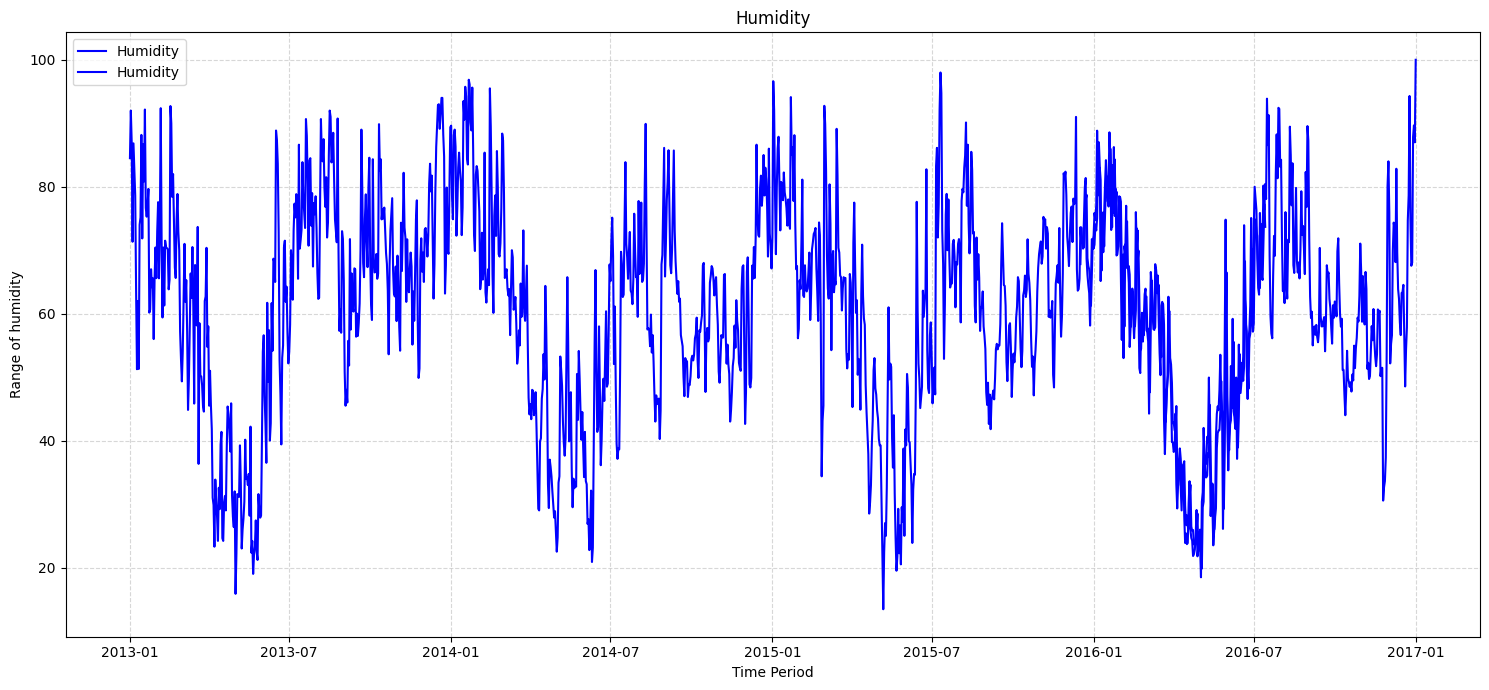

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(df, label='Humidity', color='blue')

plt.title('Humidity')
plt.xlabel('Time Period')
plt.ylabel('Range of humidity')

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-51-4750938f898e>:2: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_hum = df[['humidity']].resample('A').mean() # Average humidity for each year
<ipython-input-51-4750938f898e>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_hum = df[['humidity']].resample('M').mean() # Average humidity for each month


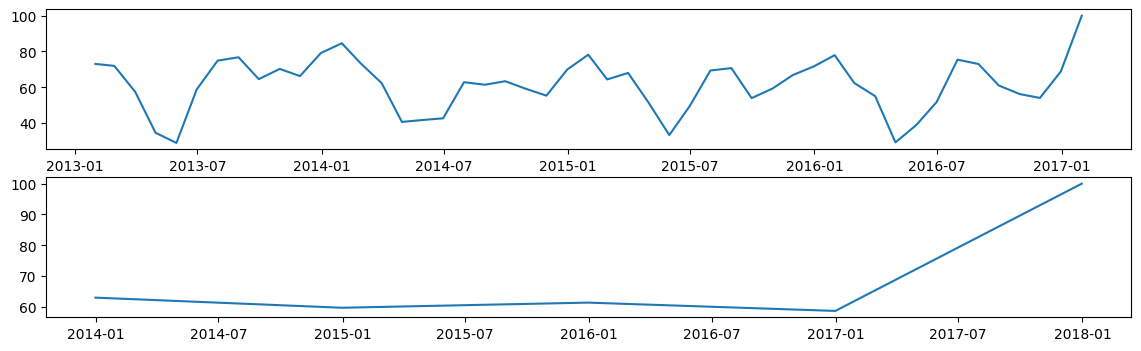

In [ ]:
plt.rcParams['figure.figsize'] = [14, 4]
annual_hum = df[['humidity']].resample('A').mean() # Average humidity for each year
monthly_hum = df[['humidity']].resample('M').mean() # Average humidity for each month
fig, axes = plt.subplots(2,1)
axes[0].plot(monthly_hum)
axes[1].plot(annual_hum)

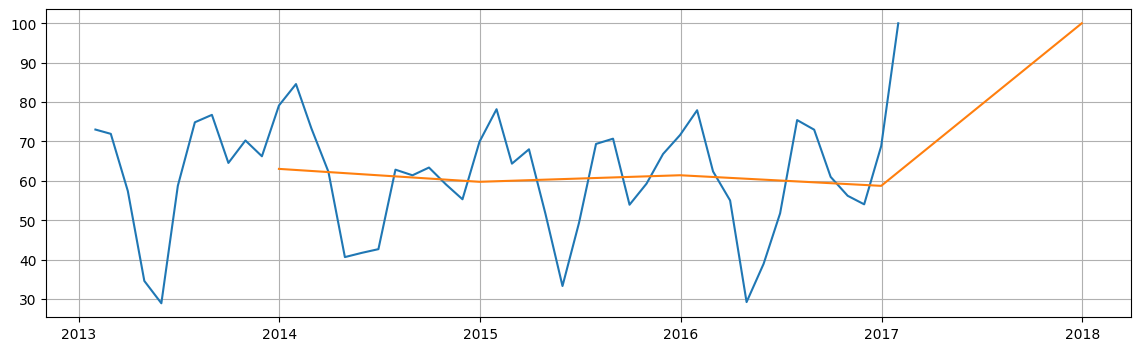

In [ ]:
# create two line plots based on the monthly_hum and annual_hum DataFrames.
plt.plot(monthly_hum)
plt.plot(annual_hum)
plt.grid();

In [ ]:
# Adfuller Test
result = adfuller(df['humidity'])
result

(-3.675576919163339,
 0.004470100478130758,
 15,
 1446,
 {'1%': -3.434880391815318,
  '5%': -2.8635408625359315,
  '10%': -2.5678352438452814},
 9961.530007876658)

In [ ]:
p_val = result[1]
p_val
if p_val < 0.05:
  print('Accept Null Hypothesis, Data is Stationary')
else:
  print('Accept alternate hypothesis, Data is not Stationary')

Accept Null Hypothesis, Data is Stationary


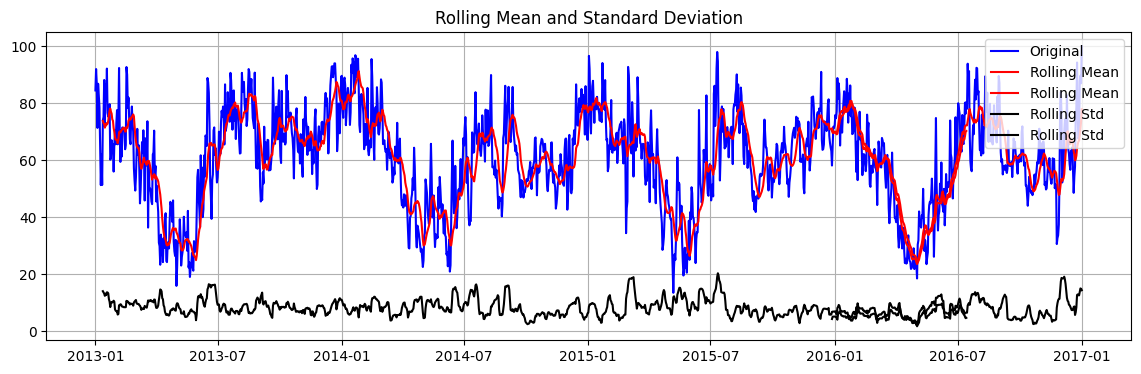

In [ ]:
# Determing rolling statistics
rolmean = df.rolling(window=12).mean()
rolstd = df.rolling(window=12).std()

# Plot rolling statistics:
orig = plt.plot(df['humidity'], color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.grid()
plt.show(block=False)

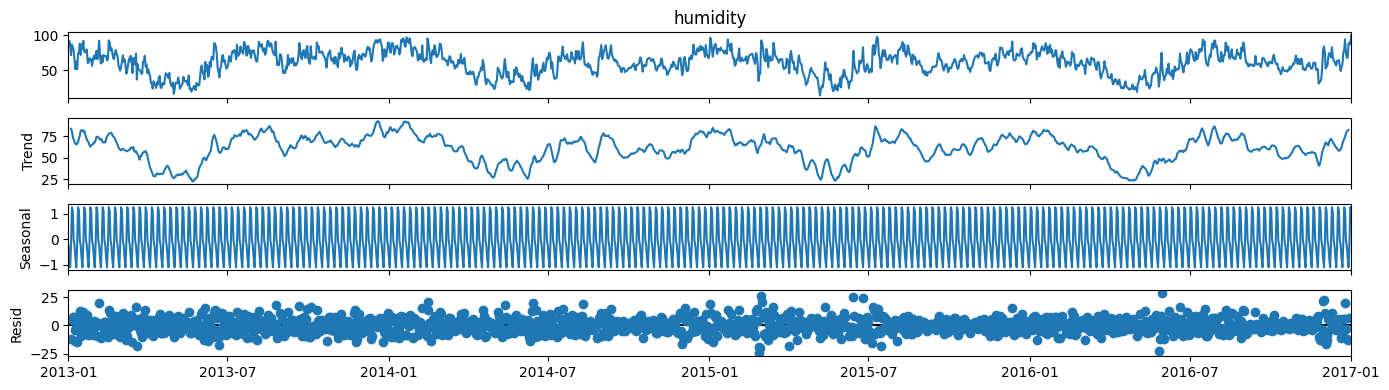

In [ ]:
# Checking Seasonality in the Data.
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(df.humidity,period = None).plot();

In [ ]:
# There is a Strong Seasonal Trend in the Data.

In [ ]:
# !pip install numpy==1.23.5 scipy==1.10.1

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 47.5 MB/s eta 0:00:00


In [ ]:
# Auto Arima - Auto ARIMA in machine learning is a technique for automatically configuring and selecting the best ARIMA (Autoregressive Integrated Moving Average)
# model for time series data. It simplifies the process of time series forecasting by automatically determining the optimal parameters (p, d, q) for the ARIMA model,
# making it easier to use for a wider range of users.

from pmdarima import auto_arima
auto = auto_arima(df['humidity'])
auto.summary()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1462
Model:               SARIMAX(2, 0, 3)   Log Likelihood               -5074.238
Date:                Sun, 08 Jun 2025   AIC                          10162.475
Time:                        12:55:13   BIC                          10199.488
Sample:                    01-01-2013   HQIC                         10176.282
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7461      0.314      2.377      0.017       0.131       1.361
ar.L1          1.3178      0.116     11.328      0.000       1.090       1.546
ar.L2         -0.3298      0.113     -2.916      0.004      -0.551      -0.108
ma.L1         -0.5377      0.115     -4.667      0.000      -0.763      -0.312
ma.L2         -0.1170      0.040     -2.960      0.003      -0.194      -0.040
ma.L3         -0.1068      0.042     -2.547      0.011      -0.189      -0.025
sigma2        60.4830      1.798     33.645      0.000      56.960      64.006
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               209.14
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.66   Skew:                             0.51
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Fitting Data into the model
import statsmodels.api as sm
sar = sm.tsa.statespace.SARIMAX(df.humidity,
                                order=(2,0,3),
                                seasonal1_order=(2,0,3,12)).fit()
sar.summary()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['seasonal1_order']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               humidity   No. Observations:                 1462
Model:               SARIMAX(2, 0, 3)   Log Likelihood               -5081.438
Date:                Sun, 08 Jun 2025   AIC                          10174.876
Time:                        12:55:16   BIC                          10206.602
Sample:                    01-01-2013   HQIC                         10186.710
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3553      0.103     13.183      0.000       1.154       1.557
ar.L2         -0.3559      0.103     -3.466      0.001      -0.557      -0.155
ma.L1         -0.5674      0.102     -5.545      0.000      -0.768      -0.367
ma.L2         -0.1171      0.039     -2.989      0.003      -0.194      -0.040
ma.L3         -0.1071      0.042     -2.563      0.010      -0.189      -0.025
sigma2        60.9661      1.749     34.853      0.000      57.538      64.395
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               212.47
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.67   Skew:                             0.50
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

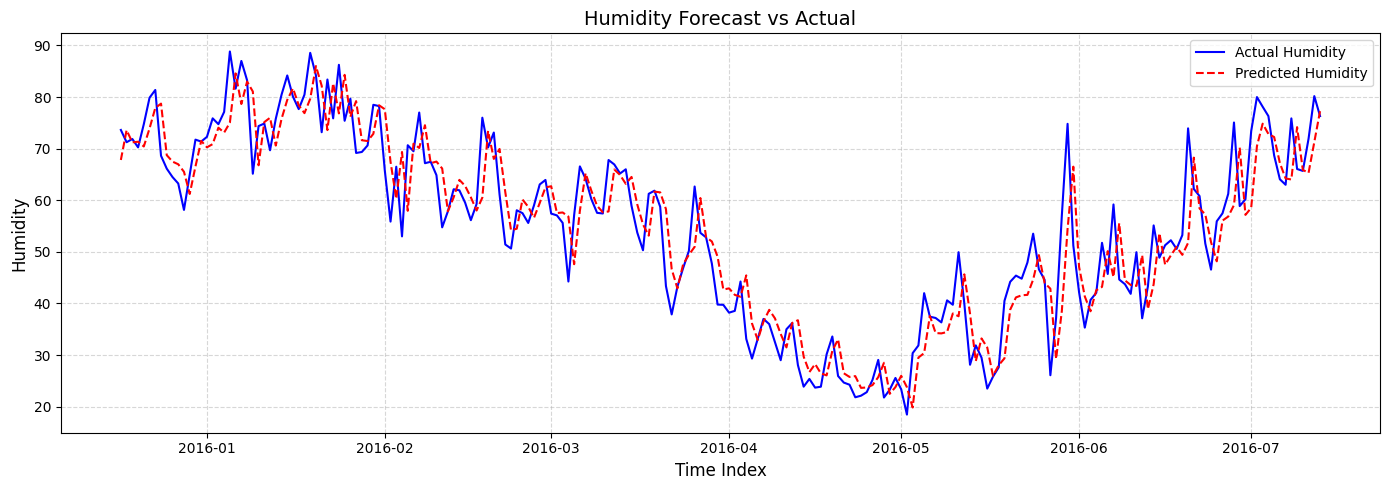

In [ ]:
# Prediction Part
import matplotlib.pyplot as plt

# Predict from index 1080 to 1290
df['Predicted'] = sar.predict(start=1080, end=1290, dynamic=False)

# figure size
plt.figure(figsize=(14, 5))

# Plot actual humidity
plt.plot(df[1080:1290]['humidity'], label='Actual Humidity', color='blue')

# Plot predicted humidity
plt.plot(df[1080:1290]['Predicted'], label='Predicted Humidity', color='red', linestyle='--')

plt.title("Humidity Forecast vs Actual", fontsize=14)
plt.xlabel("Time Index", fontsize=12)
plt.ylabel("Humidity", fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()

plt.show()


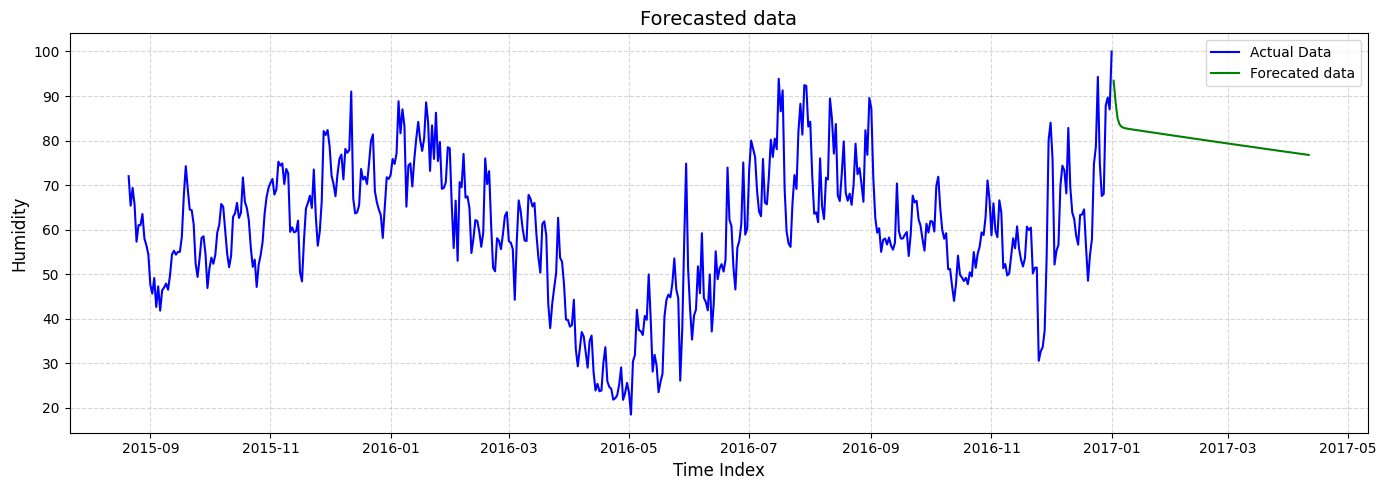

In [ ]:
#ForeCasting Part
future_fcst = sar.get_forecast(100)
# That will have a method to pull in confidence interval
confidence_int = future_fcst.conf_int(alpha = 0.01)
# Has an attribute to pull in predicted mean
fcst = future_fcst.predicted_mean

# Plot predictions and confidence intervals
plt.figure(figsize=(14, 5))

plt.plot(df.humidity[-500:], label='Actual Data', color='blue')
plt.plot(fcst, label='Forecated data', color='green')

plt.title("Forecasted data", fontsize=14)
plt.xlabel("Time Index", fontsize=12)
plt.ylabel("Humidity", fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()